## Data Prepocessing 

Import Library

In [2]:
# library for data analysis
import numpy as np
import pandas as pd

# library for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# library for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.model_selection import train_test_split

# library for collaborative filtering 
import tensorflow 
import keras
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten

# library for ignore 'warnings'
import os 
import warnings


ModuleNotFoundError: No module named 'seaborn'

Data Understanding

In [ ]:
from google.colab import files 
upload_file= files.upload()

Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv
Saving user.csv to user.csv


In [ ]:
# load dataset 
destination = pd.read_csv('/content/tourism_with_id.csv')
rating = pd.read_csv('/content/tourism_rating.csv')
user = pd.read_csv('/content/user.csv')

In [ ]:
print(f'number of tourist destination = {len(destination.Place_Id.unique())}')
print(f'number of user = {len(user.User_Id.unique())}')


number of tourist destination = 437
number of user = 300


In [ ]:
destination = destination.drop(['Time_Minutes','Coordinate' ], axis=1)
destination.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.17539,106.8272
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,5000,4.6,-6.13764,106.8171
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,-6.12531,106.8335
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,-6.30245,106.8952
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,-6.12419,106.8391


In [ ]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Lat          437 non-null    float64
 8   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 30.9+ KB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# merge rating dataset with destination dataset on Place_Id column 
full = pd.merge(rating, destination[['Place_Id', 'Place_Name', 'Category', 'Description']], on = 'Place_Id',
                        how = 'left')
full.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Description
0,1,179,3,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ê¦...
1,1,344,2,Pantai Marina,Bahari,Pantai Marina (bahasa Jawa: ê¦¥ê¦±ê¦¶ê¦±ê¦¶ê¦‚...
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...
3,1,373,3,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...


In [ ]:
#check null values on mereg dataset (full_tourism)
full.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Category         0
Description      0
dtype: int64

## Exploratory Data Analysis (EDA)
this phased is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

### Visualization

Visualization 1

In [ ]:
popular_rating = rating['Place_Id'].value_counts().reset_index()[0:10]
popular_rating = pd.merge(popular_rating, destination[['Place_Id', 'Place_Name']], 
                          how= 'left', left_on='index', right_on= 'Place_Id')

popular_rating.head(2)

,index,Place_Id_x,Place_Id_y,Place_Name
0,177,39,177,Pantai Parangtritis
1,298,39,298,Gunung Lalakon


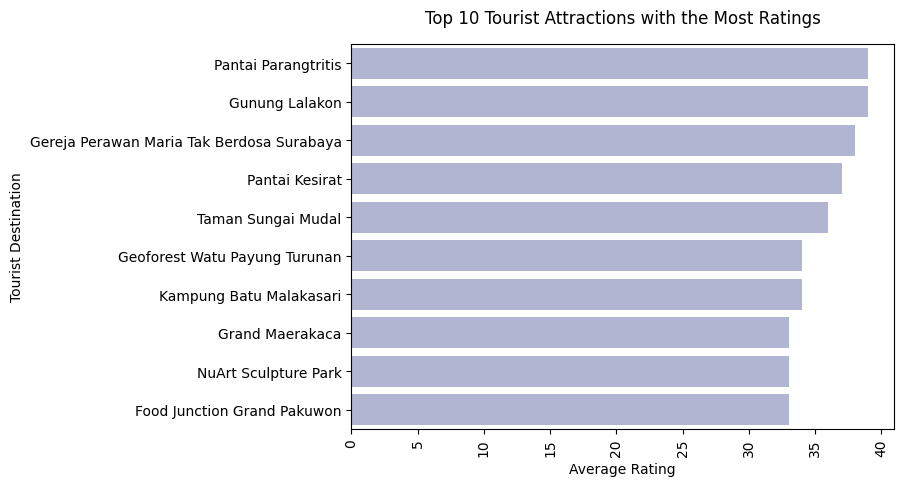

In [ ]:
# A graph of tourist destination with the highest number of ratings
plt.figure(figsize=(7,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data = popular_rating, color = '#ACB1D6')

plt.title('Top 10 Tourist Attractions with the Most Ratings', pad=15)
plt.xlabel('Average Rating')
plt.ylabel('Tourist Destination')
plt.xticks(rotation = 90)
plt.show()

Visualization 2

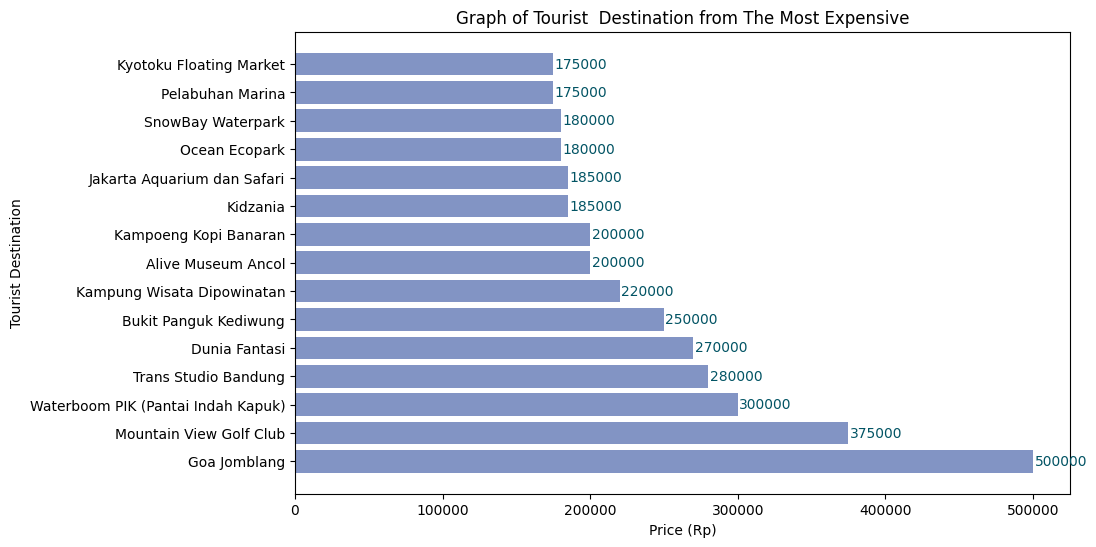

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10, 6))
place_name= destination['Place_Name']
price= destination['Price']

data_sorted = sorted(zip(place_name, price), key=lambda x: x[1], reverse = True)
data_sorted = data_sorted[:15] 

place_name_sorted, price_sorted = zip(*data_sorted)
plt.barh(place_name_sorted, price_sorted, color = '#8294C4')

# add label (price)
for i, v in enumerate(price_sorted):
  plt.text(v + 1000, i, str(v), color = '#025464', va= 'center' )


plt.xlabel('Price (Rp)')
plt.ylabel('Tourist Destination')
plt.title('Graph of Tourist  Destination from The Most Expensive')
plt.show()

Visulaization 3

(-1.25, 1.25, -1.25, 1.25)

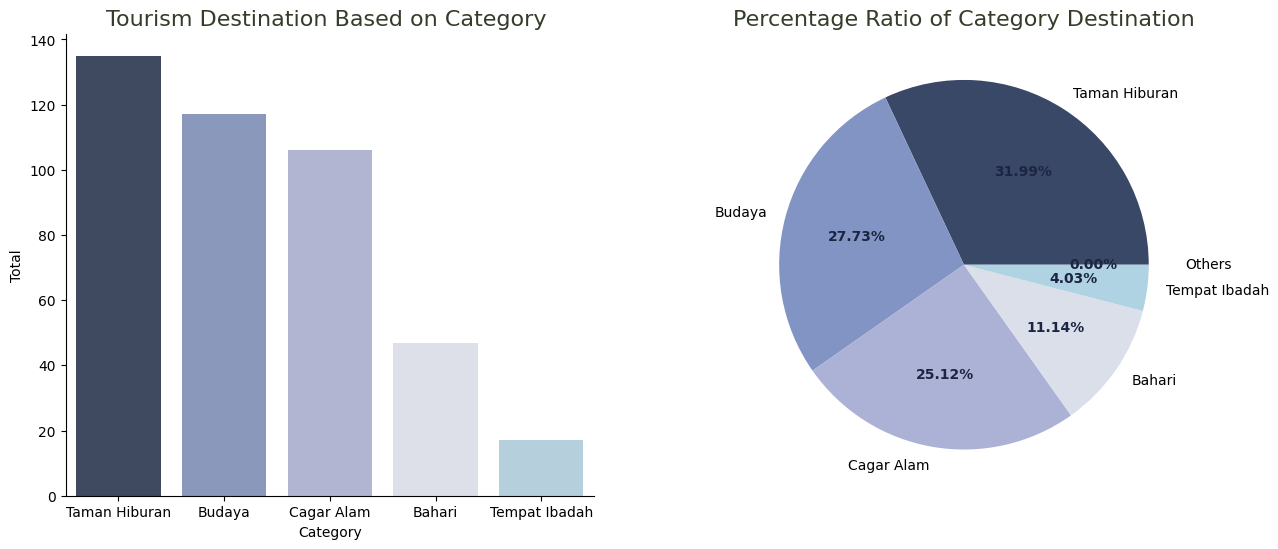

In [ ]:
# graph to see the distribution of tourist attractions by category
from collections import Counter

category_list = []
for i in destination['Category']:
    category_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

df_plot = pd.DataFrame(Counter(category_list).most_common(5), columns=['Category', 'Total'])
ax = sns.barplot(data=df_plot, x='Category', y='Total', ax=axes[0], palette=['#394867', '#8294C4', '#ACB1D6', '#DBDFEA', '#AFD3E2'])
ax.set_title('Tourism Destination Based on Category ', fontsize=16, weight=450, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(category_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'Category': 'Others', 'Total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Category Destination', fontsize=16, weight= 450, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['Total'], labels=df_plot['Category'], autopct='%.2f%%',
                                       textprops=dict(fontsize=10), explode=[0,0,0,0,0,0.1], colors=['#394867', '#8294C4', '#ACB1D6', '#DBDFEA', '#AFD3E2', '#146C94'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

Visualization 4

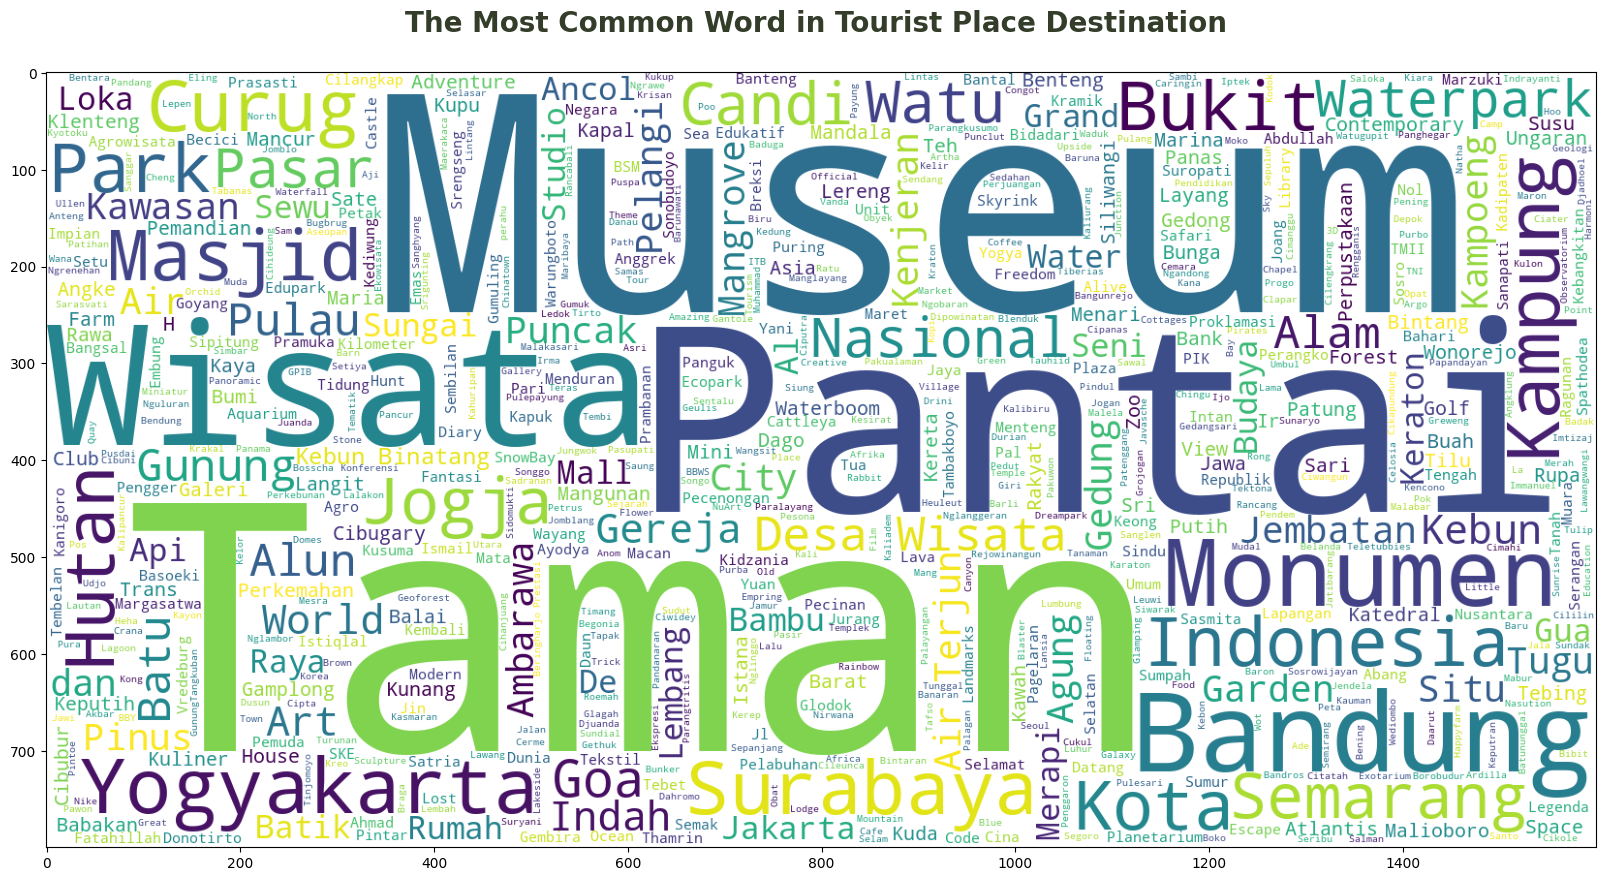

In [ ]:
# visualization to see the words that appear most frequently
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Tourist Place Destination \n', fontsize=20, weight=600, color='#333d29')
word_cloud = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(destination['Place_Name']))

plt.imshow(word_cloud)

## Content Based Filtering
Content-Based recommender system tries to guess the features or behavior of a user given the item’s features, he/she reacts positively to

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity 

In [ ]:
prepare = full

# sort "full dataframe by Place_Id"
full.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Description
6236,187,1,4,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...
5348,162,1,5,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...
5610,169,1,5,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...
2089,64,1,2,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...
5231,159,1,1,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...
...,...,...,...,...,...,...
8710,263,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...
6209,187,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...
7082,213,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...
6041,182,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...


In [ ]:
# drop duplicate Place_Id
full.drop_duplicates('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Description
0,1,179,3,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ê¦...
1,1,344,2,Pantai Marina,Bahari,Pantai Marina (bahasa Jawa: ê¦¥ê¦±ê¦¶ê¦±ê¦¶ê¦‚...
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...
3,1,373,3,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...
...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...
2399,74,350,4,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...
2448,75,10,2,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...
2534,78,7,4,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...


In [ ]:
# new variable for content based filtering 
place_id = destination['Place_Id'].tolist()
place_name = destination['Place_Name'].tolist()
place_category = destination['Category'].tolist()

In [ ]:
# check the length of each new variable (must have the SAME LENGTH) 
print(f'number of place id = {len(place_id)}')
print(f'number of place name = {len(place_name)}')
print(f'number of place category = {len(place_category)}')


number of place id = 437
number of place name = 437
number of place category = 437


In [ ]:
# dictionary for place_recommend
place_recommend = pd.DataFrame({
    'place_id' : place_id,
    'place_name' : place_name,
    'place_category' : place_category
})

place_recommend

,place_id,place_name,place_category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


In [ ]:
# data frame for content based filtering 
data_content = place_recommend
data_content

,place_id,place_name,place_category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


In [ ]:
tfidf= TfidfVectorizer()
tfidf.fit(data_content['place_name'])


TfidfVectorizer()

In [ ]:
# change data into matrix 
tfidf_matrix = tfidf.fit_transform(data_content['place_name'])
tfidf_matrix.shape

(437, 712)

In [ ]:
# change vector TF-IDF into matrix 
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# calculate the cosine similairty between the place name and each entry in 
cosine_similarity = cosine_similarity(tfidf_matrix)
cosine_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.07709925,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07709925, 1.        ,
        0.13442662],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13442662,
        1.        ]])

In [ ]:
df_cosine_similarity = pd.DataFrame(cosine_similarity, index = data_content['place_name'], columns = data_content['place_name'])
print('Shape : ', df_cosine_similarity.shape)

Shape :  (437, 437)


In [ ]:
# recommendation function for content based filtering 

def content_rec(place_name, similarity_data = df_cosine_similarity, items = data_content[['place_name', 'place_category']], k = 5) :
  index = similarity_data.loc[:, place_name].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2): -1]]
  closest = closest.drop(place_name, errors = 'ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# test the function 
content_rec('Alun-Alun Kota Bandung')

,place_name,place_category
0,Alun Alun Selatan Yogyakarta,Taman Hiburan
1,Alun-alun Utara Keraton Yogyakarta,Budaya
2,Taman Balai Kota Bandung,Taman Hiburan
3,Kota Mini,Taman Hiburan
4,Kota Tua,Budaya


In [ ]:
content_rec('Candi Prambanan')

,place_name,place_category
0,Candi Sewu,Budaya
1,Candi Ijo,Budaya
2,Candi Donotirto,Budaya
3,Candi Borobudur,Budaya
4,Candi Ratu Boko,Budaya


In [ ]:
content_rec('Glamping Lakeside Rancabali')

,place_name,place_category
0,Desa Wisata Rumah Domes/Teletubbies,Taman Hiburan
1,Bentara Budaya Yogyakarta (BBY),Budaya
2,Goa Cerme,Cagar Alam
3,Bukit Wisata Pulepayung,Cagar Alam
4,Goa Rancang Kencono,Cagar Alam


## Collaborative Filtering
Collaborative Filtering uses algorithms to filter data from user reviews to make personalized recommendations for users with similar preferences

In [ ]:
# drop duplicates Place_Id on full dataset
data_collaborative = full.drop_duplicates('Place_Id')
data_collaborative

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,Description
0,1,179,3,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ê¦...
1,1,344,2,Pantai Marina,Bahari,Pantai Marina (bahasa Jawa: ê¦¥ê¦±ê¦¶ê¦±ê¦¶ê¦‚...
2,1,5,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...
3,1,373,3,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...
4,1,101,4,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...
...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...
2399,74,350,4,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...
2448,75,10,2,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...
2534,78,7,4,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...


### Split data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(rating, test_size = 0.2)

In [ ]:
print(train.shape)
print(test.shape)

(8000, 3)
(2000, 3)


In [ ]:
number_user = len(full.User_Id.unique())
number_destination = len(full.Place_Id.unique())

print(f'number of user = {number_user}')
print(f'number of place name = {number_destination}')

number of user = 300
number of place name = 437


In [ ]:
# build recommendation system using emmbedding layers 

from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten 

EMBEDDING_DIM = 50

# input layers 
place_input = Input(shape=[1])
user_input = Input(shape=[1])

# embedding layers
place_embedding = Embedding(number_destination+1 , EMBEDDING_DIM)(place_input)
user_embedding = Embedding(number_user+1 , EMBEDDING_DIM)(user_input)

# flatte the embedddings
place_flat = Flatten()(place_embedding)
user_flat = Flatten()(user_embedding)

# output layer
output = Dot(1)([place_flat, user_flat])

# the model
model = Model([place_input, user_input], [output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        21900       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        15050       ['input_2[0][0]']                
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model.compile(loss = 'mean_squared_error', 
              optimizer = Adam(learning_rate = 0.0005)
              )

In [ ]:
train.head()

,User_Id,Place_Id,Place_Ratings
2506,77,318,4
8956,269,248,1
2812,87,389,2
2742,85,377,1
4947,149,131,5


In [ ]:
history = model.fit(x= [train.Place_Id, train.User_Id], 
                    y= train.Place_Ratings, 
                    validation_data = ([test.Place_Id, test.User_Id], test.Place_Ratings), 
                    batch_size =32 , 
                    epochs =30)

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 11.2849 - val_loss: 11.3899
Epoch 2/30
250/250 [==============================] - 1s 2ms/step - loss: 11.2413 - val_loss: 11.3666
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 11.1285 - val_loss: 11.2296
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 10.7578 - val_loss: 10.7063
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 9.8121 - val_loss: 9.4903
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 8.1727 - val_loss: 7.6663
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 6.1749 - val_loss: 5.7168
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 4.3536 - val_loss: 4.1259
Epoch 9/30
250/250 [==============================] - 1s 3ms/step - loss: 3.0621 - val_loss: 3.0923
Epoch 10/30
250/250 [==============================] - 1s 3ms/step - loss: 2.3149 - val_loss

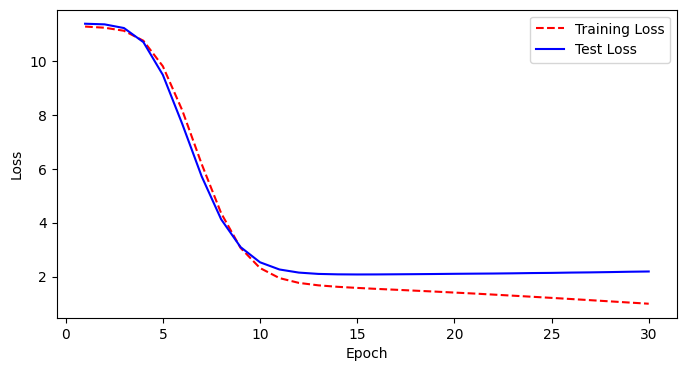

In [ ]:
# plotting validation curves 
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# create count of the number of epochs 
epoch_count = range(1, len(training_loss) + 1)

# visualize loss history 
plt.figure(figsize= (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# evaluate the model on test data
test_accuracy = model.evaluate([test.Place_Id, test.User_Id], test.Place_Ratings)
test_accuracy

63/63 [==============================] - 0s 1ms/step - loss: 2.1865


2.186479330062866

In [ ]:
# evaluating RMSE
score= model.evaluate([test.Place_Id, test.User_Id], test.Place_Ratings)
print()

print(f'RMSE = ', format(np.sqrt(score)))

63/63 [==============================] - 0s 1ms/step - loss: 2.1865

RMSE =  1.4786748561001726


because the RMSE value is small enough, the model we make is good enough to be used as a recommendation system based on collaborative filtering

In [ ]:
model.save('model.h5')

In [ ]:
from inspect import FullArgSpec
# recommendation system function using collaborative filtering
def collaborative_rec(User_Id, destination ,model):
  destination = destination.copy()
  user_ids = np.array([User_Id] * len(destination))
  results = model([destination.Place_Id.values, user_ids]).numpy().reshape(-1)

  destination['predicted_rating'] = pd.Series(results)
  destination = destination.sort_values('predicted_rating', ascending = False)

  print(f'recommendation for user = {User_Id}')
  return destination


In [ ]:
# test the function 
collaborative_rec(15, destination, model).head(5)

recommendation for user = 15


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,predicted_rating
398,399,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0,4.5,-7.32756,112.7312,4.573689
341,342,Taman Kasmaran,Taman Kasmaran terletak di sebelah kiri Pasar ...,Taman Hiburan,Semarang,3000,4.5,-6.99094,110.4066,4.369359
116,117,The World Landmarks - Merapi Park Yogyakarta,Merapi Park merupakan salah satu tempat wisata...,Taman Hiburan,Yogyakarta,22000,4.2,-7.62090,110.4216,4.332762
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.25676,112.7942,4.308484
97,98,Taman Pelangi Yogyakarta,Taman Pelangi Yogyakarta merupakan tempat wisa...,Taman Hiburan,Yogyakarta,15000,4.3,-7.75053,110.3687,4.293202


In [ ]:
collaborative_rec(100, destination, model).head(5)

recommendation for user = 100


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,predicted_rating
242,243,Kampung Korea Bandung,Kampung Korea adalah sebuah kawasan di kota Ba...,Budaya,Bandung,15000,4.1,-6.91545,107.6408,3.580597
424,425,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,-7.24780,112.7998,3.563255
101,102,Monumen Batik Yogyakarta,Perhatian pemerintah megenai kebudayan batik i...,Budaya,Yogyakarta,40000,4.5,-7.80112,110.3646,3.538512
127,128,Gumuk Pasir Parangkusumo,Gumuk Pasir Parangkusumo (bahasa Jawa: ê¦’ê¦¸ê...,Taman Hiburan,Yogyakarta,0,4.5,-8.01733,110.3181,3.512443
97,98,Taman Pelangi Yogyakarta,Taman Pelangi Yogyakarta merupakan tempat wisa...,Taman Hiburan,Yogyakarta,15000,4.3,-7.75053,110.3687,3.460894


In [ ]:
collaborative_rec(207, destination, model).head(5)

recommendation for user = 207


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,predicted_rating
386,387,Obyek Wisata Goa Kreo,Goa Kreo Semarang yang berada di ibukota Jawa ...,Cagar Alam,Semarang,5500,4.3,-7.03721,110.3476,4.050943
331,332,Rainbow Garden,Rainbow Garden Harapan Indah salah satu taman ...,Cagar Alam,Bandung,20000,4.6,-6.81795,107.6189,4.017493
219,220,Dusun Bambu,Dusun Bambu merupakan taman rekreasi berbasis ...,Taman Hiburan,Bandung,25000,4.5,-6.78971,107.5792,3.869797
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.88442,107.6068,3.864038
23,24,Museum Nasional,Museum Nasional Republik Indonesia atau Museum...,Budaya,Jakarta,5000,4.6,-6.17640,106.8216,3.730745
